In [187]:
## EV Sales Data downloaded from Vahan4Dashboard and saved as excel file by Manufacturer. 

## Down below you see the scraping script for the charging infrastructure in Delhi. 

## EV Sales (2020-2024) Delhi, India

Data downloaded from Vahan4Dashboard and saved as excel file by Manufacturer. Spreadsheet stored in Folder: Data

In [188]:
import pandas as pd

df_sales = pd.read_excel(r"C:\GithubProjects\EV-Sales-India2024\Data\Final Dataframes\Final-df_Assignment1_Sales.xlsx") # change this to your path where you download the file from data folder

In [189]:
df_sales.head()

S No                       Maker                          2024   2023  \
0   148                  OLA ELECTRIC TECHNOLOGIES PVT LTD  11650  13180   
1   227                                YC ELECTRIC VEHICLE   5997   6546   
2   205                              TVS MOTOR COMPANY LTD   4116   7531   
3    89                    HERO ELECTRIC VEHICLES PVT. LTD     61   1199   
4    17                               ATHER ENERGY PVT LTD   2215   3806   

   2022  2021  2020       TOTAL       
0  6531     0     0            31361  
1  4422  2654  1823            21442  
2  3165   823     0            15635  
3  9916  3028   264            14468  
4  2773   744     0             9538

In [190]:
# Clean up column names by stripping extra spaces
df_sales.columns = df_sales.columns.str.strip()

# Rename columns to remove any unwanted characters (if necessary)
df_sales.rename(columns={'S No': 'S_No', 'Maker': 'Maker', 'TOTAL': 'Total'}, inplace=True)

# Check cleaned column names
print(df_sales.columns)


Index(['S_No', 'Maker', '2024', '2023', '2022', '2021', '2020', 'Total'], dtype='object')


In [191]:
# Find the top 10 manufacturers by total sales
top_makers = df_sales.nlargest(10, 'Total')['Maker']

# Reshape the dataframe to have 'Maker' and 'Year' as columns
df_melted = df_sales.melt(id_vars='Maker', value_vars=['2020', '2021', '2022', '2023', '2024'], var_name='Year', value_name='Sales')

# Filter the data to include only the top manufacturers
df_melted_top = df_melted[df_melted['Maker'].isin(top_makers)]


C:\Users\risha\AppData\Local\Temp\ipykernel_92072\3926969339.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_sales, x='Maker', y='Total', palette='viridis')


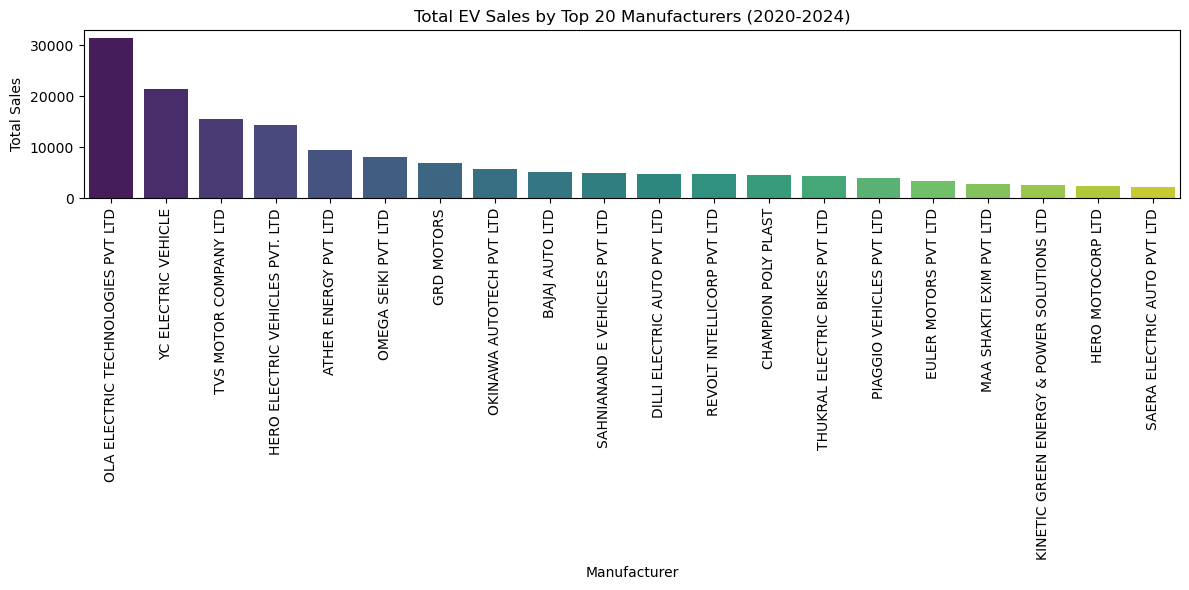

In [192]:
# Plot total sales by top 20 manufacturers
top_n = 20  # Adjust as needed
df_top_sales = df_sales.nlargest(top_n, 'Total')

plt.figure(figsize=(12, 6))
sns.barplot(data=df_top_sales, x='Maker', y='Total', palette='viridis')
plt.title(f'Total EV Sales by Top {top_n} Manufacturers (2020-2024)')
plt.xlabel('Manufacturer')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)  # Rotate for better readability
plt.tight_layout()
plt.show()


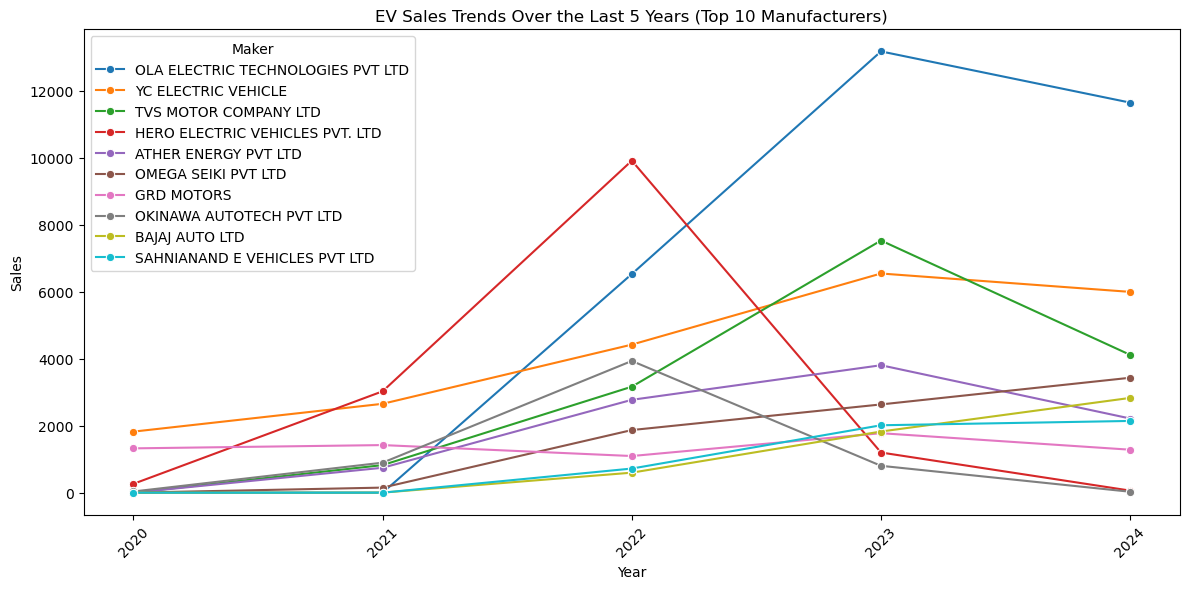

In [193]:

# Line plot to show trends over years by top manufacturers
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted_top, x='Year', y='Sales', hue='Maker', marker='o')
plt.title('EV Sales Trends Over the Last 5 Years (Top 10 Manufacturers)')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


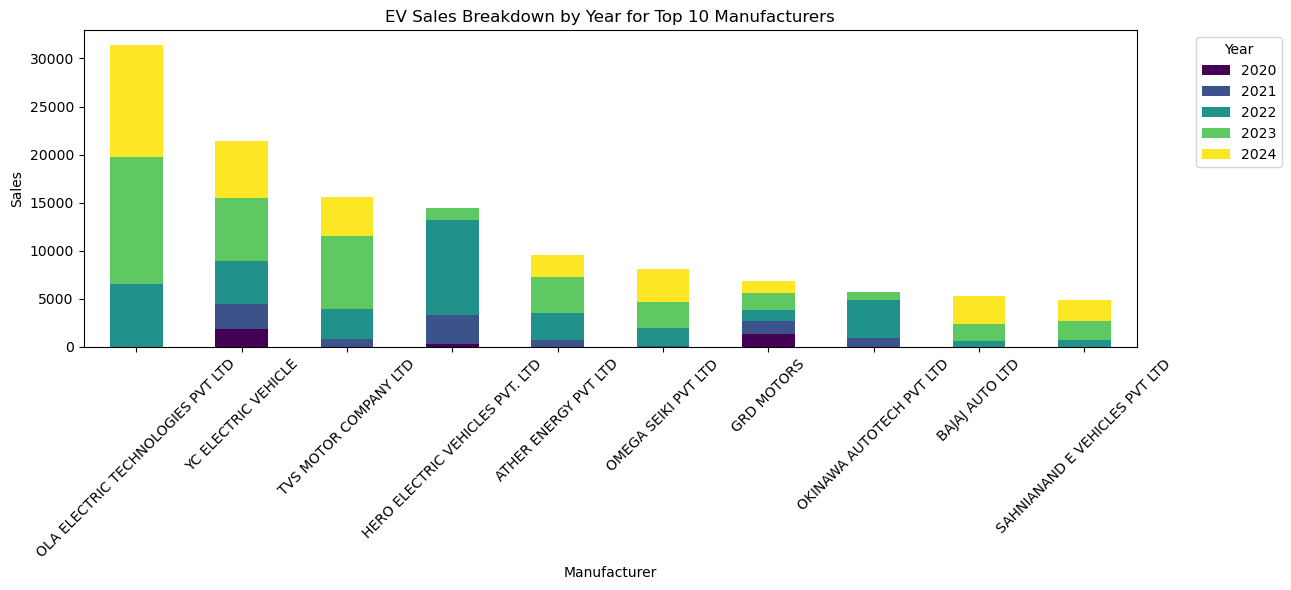

In [195]:
# Create stacked bar plot for top 10 manufacturers
top_n = 10
df_sales_stacked = df_sales.nlargest(top_n, 'Total').set_index('Maker')[['2020', '2021', '2022', '2023', '2024']]

# Plot stacked bar chart
df_sales_stacked.plot(kind='bar', stacked=True, figsize=(12, 6), cmap='viridis')
plt.title(f'EV Sales Breakdown by Year for Top {top_n} Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


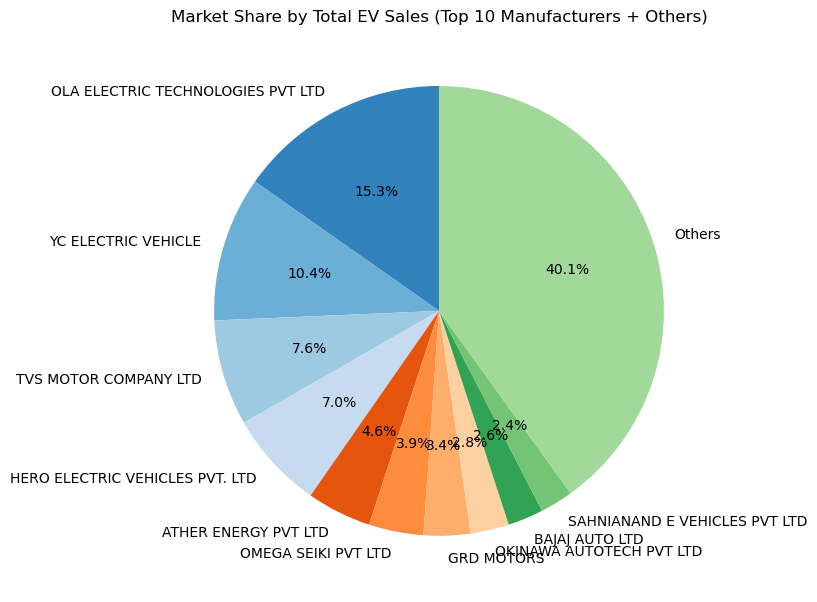

In [196]:
# Plot pie chart for top 10 manufacturers and group others
top_n = 10
df_top_n = df_sales.nlargest(top_n, 'Total')

# Calculate the "Others" share
others_total = df_sales['Total'].sum() - df_top_n['Total'].sum()

# Create a DataFrame for the "Others" row
others_row = pd.DataFrame({'Maker': ['Others'], 'Total': [others_total]})

# Concatenate the "Others" row to the top manufacturers DataFrame
df_top_n = pd.concat([df_top_n, others_row], ignore_index=True)

# Pie chart for market share
plt.figure(figsize=(8, 8))
plt.pie(df_top_n['Total'], labels=df_top_n['Maker'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('tab20c', len(df_top_n)))
plt.title(f'Market Share by Total EV Sales (Top {top_n} Manufacturers + Others)')
plt.tight_layout()
plt.show()


## Analysis of all installed charging station infrastructure in Delhi

RUN ALL CELLS TO PRODUCE A HEATMAP OF ALL CHARGING STATIONS IN DELHI

In [197]:
import requests
import json

# API endpoint URL
api_url = 'https://sm-smartconnect.azurewebsites.net/api/DistanceSwap/GetByZoneType?id=154'

# Headers (if required, based on the information from the network request)
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36',
    'Accept': 'application/json'
}

# Make the GET request to fetch the data
response = requests.get(api_url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()
    
    # Save the JSON data to a file for further review
    with open("battery_swapping_stations.json", "w") as f:
        json.dump(data, f, indent=4)
    
    print("Data successfully fetched and saved to 'battery_swapping_stations.json'")
else:
    print(f"Failed to fetch data. Status code: {response.status_code}")
    print(response.content)


Data successfully fetched and saved to 'battery_swapping_stations.json'


In [198]:
# Load the JSON data
with open("battery_swapping_stations.json", "r") as f:
    stations_data = json.load(f)

# Check if 'result' contains the stations
if 'result' in stations_data:
    # Extract the 'result' field
    stations = stations_data['result']
    
    # Print the full structure of 'result' to understand how it's organized
    print("Result structure:")
    #print(json.dumps(stations, indent=4))
else:
    print("No 'result' field found in the JSON data")


Result structure:


In [199]:
import pandas as pd
import json

# Load the JSON data
with open("battery_swapping_stations.json", "r") as f:
    stations_data = json.load(f)

# Check if 'about' exists and extract the list of features
if 'result' in stations_data and 'about' in stations_data['result']:
    features = stations_data['result']['about']['features']  # Extract the list of features from 'about'

    # Prepare a list to hold station details
    station_list = []
    
    # Loop through each feature and extract coordinates and properties
    for feature in features:
        # Ensure 'geometry' and 'properties' exist in each feature
        if 'geometry' in feature and 'properties' in feature:
            coordinates = feature['geometry']['coordinates']  # Extract coordinates (Longitude, Latitude)
            properties = feature['properties']  # Extract properties (like title)
            
            # Store the station details in a dictionary
            station_info = {
                'Name': properties.get('title', 'N/A'),  # Use 'title' as the station name
                'Latitude': coordinates[1],  # Latitude is the second item in coordinates
                'Longitude': coordinates[0]  # Longitude is the first item in coordinates
            }
            station_list.append(station_info)
    
    # Convert the list to a pandas DataFrame
    df_stations = pd.DataFrame(station_list)

    # Save to CSV
    #df_stations.to_csv('battery_swapping_stations.csv', index=False)

    # Display the DataFrame
    print(df_stations.head())

else:
    print("No 'about' field or 'features' found in the JSON data")


                         Name   Latitude  Longitude
0  Platinum-Motors-Chandigarh  30.711684  76.806394
1         Chandigarh-Zirkapur  30.676800  76.809480
2       GMP Motors Chandigarh  30.702948  76.802712
3    Chandigarh-PGI-Manimajra  30.716930  76.838000
4      Chandigarh-Elante-Mall  30.708830  76.804480


In [200]:
df_stations.head()

Name   Latitude  Longitude
0  Platinum-Motors-Chandigarh  30.711684  76.806394
1         Chandigarh-Zirkapur  30.676800  76.809480
2       GMP Motors Chandigarh  30.702948  76.802712
3    Chandigarh-PGI-Manimajra  30.716930  76.838000
4      Chandigarh-Elante-Mall  30.708830  76.804480

In [201]:
# import os
# os.chdir(r"C:\Users\risha\Downloads\EV_Analysis\Data")

## Battery swapping stations - source: Sun Mobility

In [202]:
import folium

m = folium.Map(location=[20.5937, 78.9629], zoom_start=5)  # Centered on India
    
# Add each station as a marker on the map
for _, row in df_stations.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Name']
    ).add_to(m)

# Display the map
m

### ev.delhi.gov.in Data

## Getting Charging stations

In [203]:
# import os
# os.chdir(r"C:\Users\risha\Downloads\EV_Analysis\Data")

In [204]:
import requests
from bs4 import BeautifulSoup
import re
import json
import pandas as pd

# Suppress only the InsecureRequestWarning
import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

# URL of the page that contains the charging stations data
url = 'https://ev.delhi.gov.in/charging-station'

# Fetch the HTML of the page with SSL verification disabled
response = requests.get(url, verify=False)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Find the script tag containing the 'all_locations' data
    script_tag = soup.find('script', string=re.compile('all_locations'))
    
    if script_tag:
        # Use regular expression to extract the JSON-like object
        match = re.search(r'let all_locations = (\[.*?\]);', script_tag.string, re.DOTALL)
        
        if match:
            # Get the matched string
            all_locations_json = match.group(1)
            
            # Cleaning steps to fix any issues with the JSON structure:
            # 1. Replace single quotes with double quotes
            all_locations_json = all_locations_json.replace("'", '"')
            
            # 2. Escape backslashes to prevent invalid escape sequences
            all_locations_json = all_locations_json.replace("\\", "\\\\")
            
            # 3. Remove trailing commas inside the JSON object (if any)
            all_locations_json = re.sub(r',\s*}', '}', all_locations_json)  # Handle commas before closing braces
            all_locations_json = re.sub(r',\s*]', ']', all_locations_json)  # Handle commas before closing brackets
            
            # Try to parse the cleaned JSON-like object
            try:
                all_locations = json.loads(all_locations_json)
                
                # Convert the list to a DataFrame
                df = pd.DataFrame(all_locations)
                
                # Display the DataFrame
                print(df)
                
                # Additional check: Number of charging stations in the data source vs obtained
                total_stations = len(all_locations)
                obtained_stations = len(df)
                
                print(f"Total charging stations in source: {total_stations}")
                print(f"Charging stations obtained in DataFrame: {obtained_stations}")
            
            except json.JSONDecodeError as e:
                print(f"Failed to parse JSON: {e}")
        else:
            print("Failed to extract 'all_locations' data.")
else:
    print(f"Failed to fetch data. Status code: {response.status_code}")


                                               address postal_code capacity  \
0          175, Patparganj Industrial Area, Patparganj      110092    3.3kw   
1    A-1/1, Hardev Puri, 100 ft Road, Nathu Colony ...      110025    3.3kw   
2                    Plot no. 1-A, Shiv vihar, Nangloi      110019    3.3kw   
3                     M block Market Gearter Kailash 1      110041    3.3kw   
4                     Shop No-48, NH-5, NIT, Faridabad      110052    3.3kw   
..                                                 ...         ...      ...   
886  Shop No-1, Rajeev Vihar, Khora Colony, Sector-...      201301            
887  Shop No-1, Sector-4, Near Ek Mutri Gol Chakkar...      201301            
888  House No-93, Shop No-PVT-1, Ground Floor, Bloc...      110085            
889  Shop No-RZ-62-K/6A, Ground Flour, Vashist Park...      110046            
890  Shop No-B-308, First Floor, Madanpur Khadar Ex...      110076            

          city     close cost_per_unit country   la

In [205]:
df.shape

(891, 23)

In [206]:
df.head()

address postal_code capacity  \
0        175, Patparganj Industrial Area, Patparganj      110092    3.3kw   
1  A-1/1, Hardev Puri, 100 ft Road, Nathu Colony ...      110025    3.3kw   
2                  Plot no. 1-A, Shiv vihar, Nangloi      110019    3.3kw   
3                   M block Market Gearter Kailash 1      110041    3.3kw   
4                   Shop No-48, NH-5, NIT, Faridabad      110052    3.3kw   

        city     close cost_per_unit country   latitude  longitude      open  \
0  New Delhi  21:00:00            15   India  28.642213  77.314837  08:00:00   
1  New Delhi  21:00:00            15   India  28.689606  77.298775  09:00:00   
2  New Delhi  21:00:00            15   India  28.661666  77.061585  10:00:00   
3  New Delhi  21:00:00            15   India  28.550284  77.235053  11:00:00   
4  New Delhi  21:00:00            15   India  28.405363  77.305530  12:00:00   

   ... charger_type if_battery_swap_station,_no._of_dockets   id  \
0  ...       LEV AC                                     nil  S01   
1  ...       LEV AC                                     nil  S02   
2  ...       LEV AC                                     nil  S03   
3  ...       LEV AC                                     nil  S04   
4  ...       LEV AC                                     nil  S05   

             vendor charging_type contact_number name  \
0  Massive Mobility      Charging                       
1  Massive Mobility      Charging                       
2  Massive Mobility      Charging                       
3  Massive Mobility      Charging                       
4  Massive Mobility      Charging                       

                                         coordinates               timing  \
0  {'latitude': '28.642213', 'longitude': '77.314...  08:00:00 - 21:00:00   
1  {'latitude': '28.689606', 'longitude': '77.298...  09:00:00 - 21:00:00   
2  {'latitude': '28.661666', 'longitude': '77.061...  10:00:00 - 21:00:00   
3  {'latitude': '28.550284', 'longitude': '77.235...  11:00:00 - 21:00:00   
4  {'latitude': '28.405363', 'longitude': '77.305...  12:00:00 - 21:00:00   

  no_of_chargers  
0              2  
1              1  
2             10  
3              1  
4              1  

[5 rows x 23 columns]

In [207]:
df['if_battery_swap_station,_no._of_dockets'].unique()

array(['nil', 'NILL', '', 'Nil', 'S12', 'S14', 'S15', 'S16', 'S18', 'S19',
       'S28', 'S30', 'S31', 'S32', 'S33', 'S34', 'S35', 'S36', 'S37',
       'S38', 'S39', 'S40'], dtype=object)

In [208]:
# Check how many rows are not 'nil', 'NILL', or empty
non_nil_count = df[df['if_battery_swap_station,_no._of_dockets'].str.lower().isin(['nil', 'nill', '']) == False].shape[0]

print(f"Number of non-nil entries: {non_nil_count}")


Number of non-nil entries: 21


In [209]:
# import folium
# import pandas as pd

# # Assuming df is your DataFrame with the charging stations data

# # Convert 'latitude' and 'longitude' columns to numeric, forcing errors to NaN
# df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
# df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

# # Drop rows where 'latitude' or 'longitude' are NaN
# df = df.dropna(subset=['latitude', 'longitude'])

# # Check the condition for non-nil entries in the 'if_battery_swap_station,_no._of_dockets' column
# condition = df['if_battery_swap_station,_no._of_dockets'].str.lower().isin(['nil', 'nill', '']) == False

# # Create a folium map centered around the mean latitude and longitude
# map_center = [df['latitude'].mean(), df['longitude'].mean()]
# m = folium.Map(location=map_center, zoom_start=12)

# # Add markers for each charging station
# for idx, row in df.iterrows():
#     if condition[idx]:  # Mark non-nil entries with a different color
#         marker_color = 'green'
#     else:
#         marker_color = 'red'
    
#     folium.Marker(
#         location=[row['latitude'], row['longitude']],
#         popup=f"Address: {row['address']}<br>Capacity: {row['capacity']}<br>Postal Code: {row['postal_code']}",
#         tooltip=row['city'],
#         icon=folium.Icon(color=marker_color)
#     ).add_to(m)

# # Save the map to an HTML file and display
# m.save('charging_stations_and_battery_swapping_stations_delhi.html')
# m


In [210]:
#trying evyatra.beeindia data

In [211]:
import requests
import json

# Define the API endpoint
api_url = "https://evyatra.beeindia.gov.in/bee-ev-backend/searchbystationname"

# Function to search for a station by name using the API
def search_station_by_name(station_name):
    payload = station_name.encode('utf-8')  # Ensure the station name is properly encoded
    headers = {
        'Content-Type': 'application/x-www-form-urlencoded; charset=UTF-8',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/127.0.0.0 Safari/537.36 OPR/113.0.0.0',
        'X-Requested-With': 'XMLHttpRequest',
    }
    
    try:
        response = requests.post(api_url, headers=headers, data=f'stationname={payload}')
        if response.status_code == 200:
            station_details = response.json()
            print(f"Results for station '{station_name}': {station_details}")
            return station_details
        else:
            print(f"Failed to search for station '{station_name}'. Status code: {response.status_code}")
    except Exception as e:
        print(f"Error fetching details for station '{station_name}': {e}")

# List of sample station names to search (you can expand this)
station_names = [
    "Ather",     # Example for Ather stations
    "Tata",      # Example for Tata Power EV stations
    "ChargeGrid",# Example for ChargeGrid stations
    # Add more patterns or station names as needed
]

# Collecting station data
stations_data = []

# Loop through station names and get data
for name in station_names:
    details = search_station_by_name(name)
    if details:
        stations_data.append(details)

# Save the station data to a JSON file
if stations_data:
    with open('station_search_results.json', 'w') as f:
        json.dump(stations_data, f, indent=4)
    print("Charging station data saved to 'station_search_results.json'.")
else:
    print("No station data collected.")


Results for station 'Ather': {'type': 'TRUE', 'message': ' DATA LOADED SUCCESSFULLY', 'result': 'TRUE', 'value': [{'id': 11131, 'lat': 10.080327, 'lng': 77.9777, 'cs_displayno': 23044140, 'station_name': ' ', 'address': 'Hotel Templecity,Nh 44 Madurai To Dindigul Highway ,Vadipatti,Vadipatti', 'st_owner': None, 'companyname': 'Zeon Charging', 'mobile_no': 9994806161, 'contactPerson': '', 'amenities': None, 'avg_cost_discom': None, 'opening_time': None, 'closing_time': None, 'is_tweenty_four_seven': 'f', 'city_name': 'Madurai'}, {'id': 42342, 'lat': 16.31450889825, 'lng': 80.234501885311, 'cs_displayno': 24071625, 'station_name': '-', 'address': '113 Talluru, Guntur District', 'st_owner': None, 'companyname': 'HINDUSTAN PETROLEUM CORPORATION LIMITED', 'mobile_no': '', 'contactPerson': '', 'amenities': None, 'avg_cost_discom': None, 'opening_time': None, 'closing_time': None, 'is_tweenty_four_seven': 'f', 'city_name': 'Parastyalluru'}, {'id': 39299, 'lat': 12.895235440557, 'lng': 77.5644

In [212]:
# import requests
# import json
# import time

# # Base URL for station search API
# base_url = "https://evyatra.beeindia.gov.in/bee-ev-backend/searchbystationname"

# # Headers (if needed)
# headers = {
#     "Content-Type": "application/x-www-form-urlencoded",
#     "Accept": "*/*",
#     "User-Agent": "Mozilla/5.0"
# }

# # List of station names (or letters) to search through
# search_terms = [chr(i) for i in range(65, 91)]  # A-Z letters
# station_data = []

# for term in search_terms:
#     print(f"Searching for stations with term: {term}")
    
#     try:
#         # Payload with search term
#         payload = {"search": term}

#         # Sending the POST request
#         response = requests.post(base_url, headers=headers, data=payload)
        
#         if response.status_code == 200:
#             data = response.json()
            
#             # Check if the response has station details
#             if data['type'] == 'TRUE' and 'value' in data:
#                 station_data.extend(data['value'])
#                 print(f"Found {len(data['value'])} stations for search term: {term}")
        
#         # Sleep for a short time to avoid overwhelming the server
#         time.sleep(1)
    
#     except Exception as e:
#         print(f"Error searching for term {term}: {e}")

# # Save collected station data to a JSON file
# with open('all_stations_data.json', 'w') as outfile:
#     json.dump(station_data, outfile, indent=4)

# print(f"Total stations found: {len(station_data)}")


In [213]:
# Leave for now

In [214]:
import pandas as pd

# Step 1: Rename the columns in df_stations to match df
df_stations.rename(columns={'Name': 'address', 'Latitude': 'latitude', 'Longitude': 'longitude'}, inplace=True)

# Step 2: Add missing columns to df_stations with NaN or appropriate default values
# We fill with NaN for now; you can adjust if needed
missing_columns = [col for col in df.columns if col not in df_stations.columns]
for col in missing_columns:
    df_stations[col] = pd.NA

# Step 3: Add 'station_type' column to both DataFrames
df['station_type'] = 'Charging Station'
df.loc[
    df['if_battery_swap_station,_no._of_dockets'].str.lower().isin(['nil', 'nill', '']) == False, 
    'station_type'
] = 'Battery Swapping Station'
df_stations['station_type'] = 'Battery Swapping Station'

# Step 4: Concatenate the DataFrames
combined_df = pd.concat([df, df_stations], ignore_index=True)

# Step 5: Save the combined DataFrame to a new CSV file
combined_df.to_csv('combined_stations_with_types.csv', index=False)

# Step 6: Visualize the combined DataFrame using folium
import folium

# Convert 'latitude' and 'longitude' columns to numeric in the combined DataFrame
combined_df['latitude'] = pd.to_numeric(combined_df['latitude'], errors='coerce')
combined_df['longitude'] = pd.to_numeric(combined_df['longitude'], errors='coerce')

# Drop rows where 'latitude' or 'longitude' are NaN
combined_df = combined_df.dropna(subset=['latitude', 'longitude'])


In [215]:
combined_df.shape

(1442, 24)

In [216]:
combined_df.columns

Index(['address', 'postal_code', 'capacity', 'city', 'close', 'cost_per_unit',
       'country', 'latitude', 'longitude', 'open', 'payment_modes', 'staff',
       'available', 'charger_type', 'if_battery_swap_station,_no._of_dockets',
       'id', 'vendor', 'charging_type', 'contact_number', 'name',
       'coordinates', 'timing', 'no_of_chargers', 'station_type'],
      dtype='object')

In [217]:
combined_df['no_of_chargers'].unique()

array([2, 1, 10, 5, 3, 36, 18, 26, 34, 4, 20, 7, 12, 24, 6, 16, 8, 44, 14,
       30, 42, 40, 50, 28, 46, 22, 32, <NA>], dtype=object)

Visualizing all charging infrastructure (Charging Stations and Battery Swapping Stations)

In [218]:
import folium

# Center the map explicitly on New Delhi
map_center = [28.6139, 77.2090]  # Coordinates for New Delhi
m = folium.Map(location=map_center, zoom_start=12)

# Add markers for each station
for idx, row in combined_df.iterrows():
    # Set marker color based on station type
    if row['station_type'] == 'Battery Swapping Station':
        marker_color = 'blue'
    else:
        marker_color = 'green'  # Charging Stations
    
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Address: {row['address']}<br>Capacity: {row.get('capacity', 'N/A')}<br>Postal Code: {row.get('postal_code', 'N/A')}<br>Type: {row['station_type']}",
        tooltip=row['city'] if 'city' in row else '',
        icon=folium.Icon(color=marker_color)
    ).add_to(m)

# ------------------ Add an improved custom legend with correct box shadow ------------------

legend_html = '''
     <div style="
     position: fixed; 
     bottom: 50px; left: 50px; width: 180px; 
     background-color: rgba(255, 255, 255, 0.8); 
     border-radius: 8px;
     box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.3);
     padding: 10px; font-size: 14px; z-index: 9999; 
     ">
     <div style="display: flex; align-items: center; margin-bottom: 8px;">
         <i class="fa fa-map-marker" style="color:blue; font-size: 18px;"></i>
         <span style="margin-left: 8px;">Battery Swapping Station</span>
     </div>
     <div style="display: flex; align-items: center;">
         <i class="fa fa-map-marker" style="color:green; font-size: 18px;"></i>
         <span style="margin-left: 8px;">Charging Station</span>
     </div>
     </div>
     '''

# Add the improved legend to the map
m.get_root().html.add_child(folium.Element(legend_html))

# Save the map to an HTML file and display
m.save('combined_charging_battery_map.html')

# Display the map (will render in Jupyter, or check the saved HTML file)
m


In [219]:
# import os
# os.chdir(r"C:\Users\risha\Downloads\EV_Analysis\Data")

In [220]:
import pandas as pd

# Load the combined DataFrame (if not already loaded)
df_combined = pd.read_csv('combined_stations_with_types.csv')

# Define the bounding box for Delhi
# Approximate latitudes and longitudes for Delhi's bounding box (you can adjust this as needed)
min_latitude = 28.4  # South of Delhi
max_latitude = 28.9  # North of Delhi
min_longitude = 76.8  # West of Delhi
max_longitude = 77.4  # East of Delhi

# Filter the DataFrame based on the bounding box for Delhi
df_delhi = df_combined[
    (df_combined['latitude'] >= min_latitude) &
    (df_combined['latitude'] <= max_latitude) &
    (df_combined['longitude'] >= min_longitude) &
    (df_combined['longitude'] <= max_longitude)
]

# Alternatively, you can also filter based on city name if the 'city' column is accurate
# df_delhi = df_combined[df_combined['city'].str.contains("Delhi", case=False, na=False)]

# Save the filtered data to a new CSV
df_delhi.to_csv('delhi_filtered_stations.csv', index=False)

# Display some rows of the filtered DataFrame
print(f"Total stations in Delhi area: {df_delhi.shape[0]}")
print(df_delhi.head())


Total stations in Delhi area: 1173
                                             address  postal_code capacity  \
0        175, Patparganj Industrial Area, Patparganj     110092.0    3.3kw   
1  A-1/1, Hardev Puri, 100 ft Road, Nathu Colony ...     110025.0    3.3kw   
2                  Plot no. 1-A, Shiv vihar, Nangloi     110019.0    3.3kw   
3                   M block Market Gearter Kailash 1     110041.0    3.3kw   
4                   Shop No-48, NH-5, NIT, Faridabad     110052.0    3.3kw   

        city     close  cost_per_unit country   latitude  longitude      open  \
0  New Delhi  21:00:00           15.0   India  28.642213  77.314837  08:00:00   
1  New Delhi  21:00:00           15.0   India  28.689606  77.298775  09:00:00   
2  New Delhi  21:00:00           15.0   India  28.661666  77.061585  10:00:00   
3  New Delhi  21:00:00           15.0   India  28.550284  77.235053  11:00:00   
4  New Delhi  21:00:00           15.0   India  28.405363  77.305530  12:00:00   

   ... if

In [221]:
# Check the number of stations in each station_type category
station_type_counts = df_delhi['station_type'].value_counts()

# Display the result
print(station_type_counts)


station_type
Charging Station            737
Battery Swapping Station    436
Name: count, dtype: int64


## HEATMAP

In [222]:
import pandas as pd
import folium
from sklearn.cluster import DBSCAN
from folium.plugins import HeatMap

# Load the filtered Delhi DataFrame
df_delhi = pd.read_csv('delhi_filtered_stations.csv')

# Extract latitude and longitude data for clustering
coords = df_delhi[['latitude', 'longitude']].dropna()

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.01, min_samples=5).fit(coords)
df_delhi['cluster'] = dbscan.labels_

# Create a Folium map centered around Delhi
map_center = [28.6139, 77.2090]  # Static coordinates for Delhi
m = folium.Map(location=map_center, zoom_start=12)

# Add markers for each station, coloring by cluster and type (charging/swapping)
for idx, row in df_delhi.iterrows():
    marker_color = 'red' if row['station_type'] == 'Charging Station' else 'blue'
    
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=6,
        popup=f"Address: {row['address']}<br>Type: {row['station_type']}<br>Cluster: {row['cluster']}",
        color=marker_color,
        fill=True,
        fill_opacity=0.7
    ).add_to(m)

# Display the map directly in the notebook
m  # This renders the map inline in the notebook

# Create a heat map for station density
heat_data = [[row['latitude'], row['longitude']] for index, row in df_delhi.iterrows() if not pd.isna(row['latitude']) and not pd.isna(row['longitude'])]
m_heat = folium.Map(location=map_center, zoom_start=12)
HeatMap(heat_data).add_to(m_heat)

# Display the heatmap directly in the notebook
m_heat  # This renders the heatmap inline in the notebook


In [223]:
df_delhi['cluster'].unique()

array([ 0,  1,  2, -1,  3, 25,  4,  5,  6,  7, 15,  8, 14, 16, 11,  9, 10,
       12, 13, 17, 28, 18, 19, 20, 21, 22, 23, 24, 26, 27, 29, 30],
      dtype=int64)

In [224]:
import pandas as pd
import folium
from sklearn.cluster import DBSCAN
import matplotlib.cm as cm
import numpy as np

# Extract latitude and longitude data for clustering
coords = df_delhi[['latitude', 'longitude']].dropna()

# Apply DBSCAN clustering with improved parameters
dbscan = DBSCAN(eps=0.006, min_samples=10).fit(coords)
df_delhi['cluster'] = dbscan.labels_

# Define map center for clustering visualization (Delhi)
map_center = [28.6139, 77.2090]  # Coordinates for Delhi

# Create a Folium map centered around Delhi
m_cluster = folium.Map(location=map_center, zoom_start=12)

# Generate distinct colors for each cluster
num_clusters = len(set(df_delhi['cluster'])) - (1 if -1 in df_delhi['cluster'] else 0)  # exclude noise (-1)
colors = cm.rainbow(np.linspace(0, 1, num_clusters))

# Create a dictionary mapping cluster labels to colors
cluster_color_mapping = {label: f'#{int(255*r):02x}{int(255*g):02x}{int(255*b):02x}' 
                         for label, (r, g, b, _) in zip(range(num_clusters), colors)}

# Add markers for each station, coloring by cluster and type (charging/swapping)
for idx, row in df_delhi.iterrows():
    # Use unique colors for each cluster, black for noise points (-1)
    if row['cluster'] == -1:
        marker_color = 'black'  # Noise points
    else:
        marker_color = cluster_color_mapping[row['cluster']]  # Color for each cluster
    
    # Add a circle marker for each station
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=6,
        popup=f"Address: {row['address']}<br>Type: {row['station_type']}<br>Cluster ID: {row['cluster']}",
        color=marker_color,
        fill=True,
        fill_opacity=0.7
    ).add_to(m_cluster)
    
    # Add a label for Cluster ID using DivIcon
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        icon=folium.DivIcon(html=f"""<div style="font-size: 12px; color: black;"><b>{row['cluster']}</b></div>""")
    ).add_to(m_cluster)

# Display the clustered station map
m_cluster  # This renders the clustered map inline in the notebook


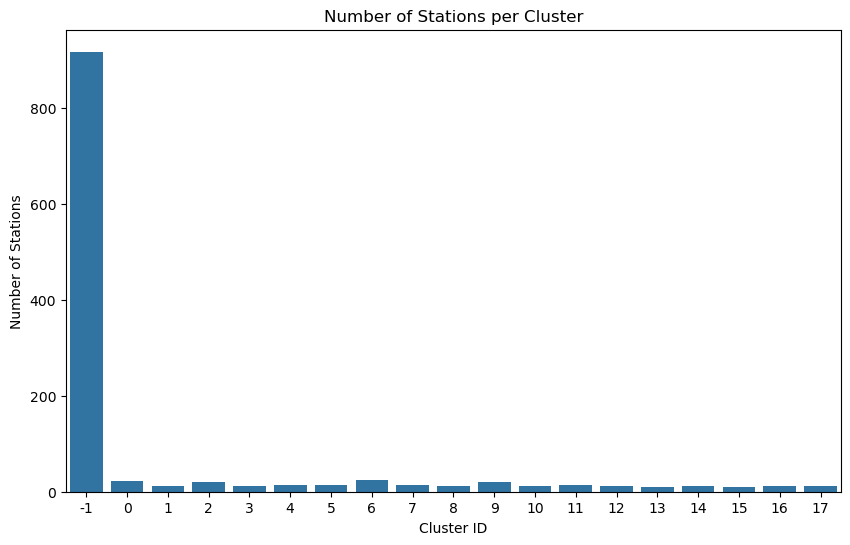

In [225]:
# Plot the number of stations in each cluster
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', data=df_delhi)
plt.title('Number of Stations per Cluster')
plt.xlabel('Cluster ID')
plt.ylabel('Number of Stations')
plt.show()


### Biggest Charging station clusters in Delhi

C:\Users\risha\AppData\Local\Temp\ipykernel_92072\2685989848.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster_label', data=df_clusters, palette='viridis', order=sorted(df_clusters['cluster_label'].unique()))


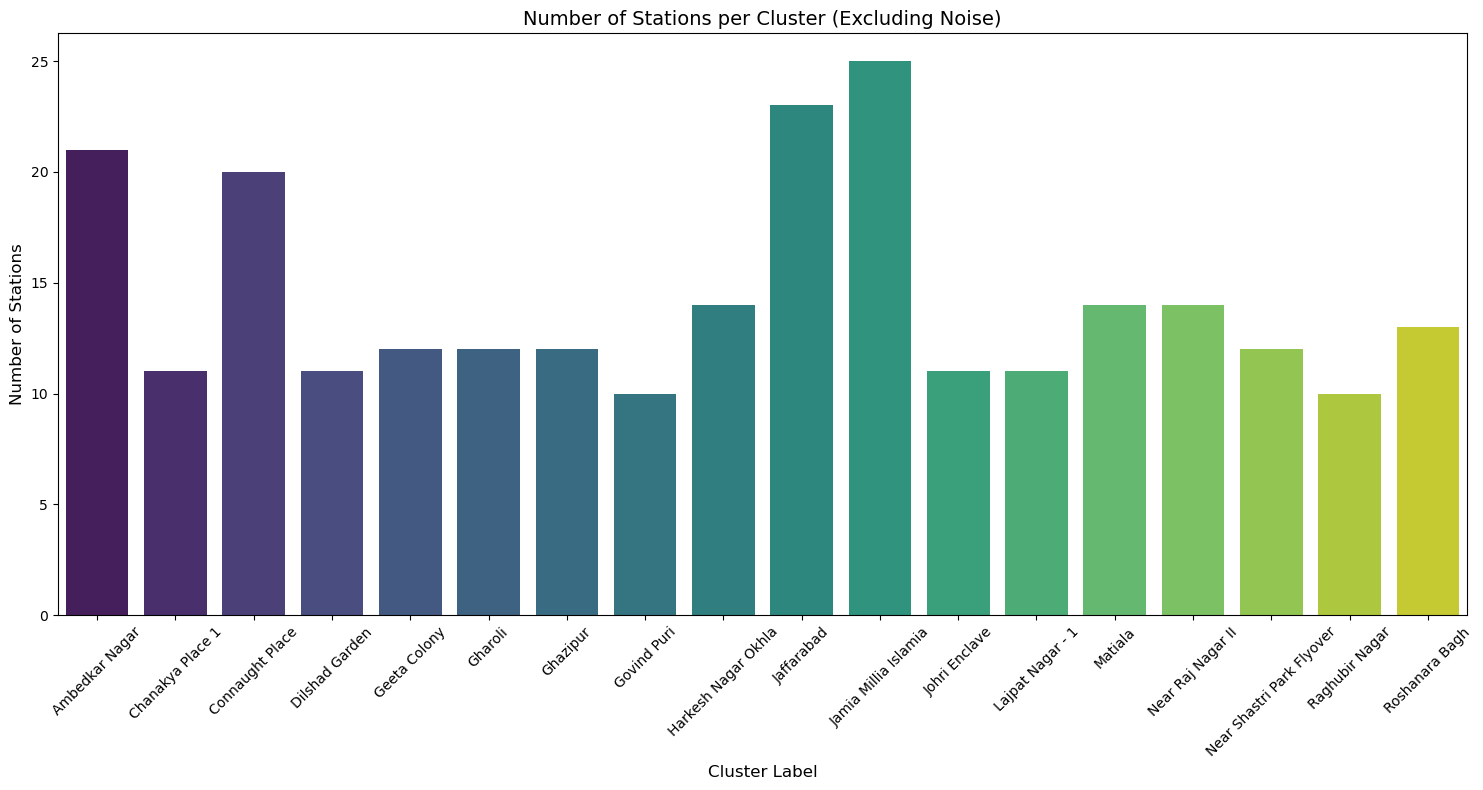

In [226]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out rows where the cluster ID is -1 (noise)
df_clusters = df_delhi[df_delhi['cluster'] != -1].copy()

# Create a dictionary mapping cluster IDs to human-readable labels for the clusters from 0 to 17
cluster_labels = {
    0: 'Jaffarabad', #Done
    1: 'Gharoli',#Done
    2: 'Connaught Place', #Done
    3: 'Ghazipur', #Done
    4: 'Harkesh Nagar Okhla',#Done
    5: 'Matiala', #Done
    6: 'Jamia Millia Islamia', #Done
    7: 'Roshanara Bagh', #Done
    8: 'Geeta Colony', #Done
    9: 'Ambedkar Nagar', #Done
    10: 'Johri Enclave', #Done
    11: 'Near Raj Nagar II', #Done
    12: 'Near Shastri Park Flyover',#Done
    13: 'Govind Puri',#Done
    14: 'Lajpat Nagar - 1', #Done
    15: 'Raghubir Nagar', #Done
    16: 'Chanakya Place 1', #Done
    17: 'Dilshad Garden' #Done
}

# Map cluster IDs to labels where applicable, and leave others unchanged
df_clusters['cluster_label'] = df_clusters['cluster'].apply(lambda x: cluster_labels.get(x, str(x)))

# Plot the number of stations in each cluster, ensuring all clusters are visualized
plt.figure(figsize=(15, 8))
sns.countplot(x='cluster_label', data=df_clusters, palette='viridis', order=sorted(df_clusters['cluster_label'].unique()))
plt.title('Number of Stations per Cluster (Excluding Noise)', fontsize=14)
plt.xlabel('Cluster Label', fontsize=12)
plt.ylabel('Number of Stations', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()  # Adjust layout to fit everything
plt.show()


In [227]:
import pandas as pd
import folium
from sklearn.cluster import DBSCAN
from folium.plugins import HeatMap

# Load the filtered Delhi DataFrame
df_delhi = pd.read_csv('delhi_filtered_stations.csv')

# Extract latitude and longitude data for clustering
coords = df_delhi[['latitude', 'longitude']].dropna()

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.01, min_samples=5).fit(coords)
df_delhi['cluster'] = dbscan.labels_

# Create a Folium map centered around Delhi
map_center = [28.6139, 77.2090]  # Static coordinates for Delhi
m = folium.Map(location=map_center, zoom_start=12)

# Add markers for each station, coloring by cluster and type (charging/swapping)
for idx, row in df_delhi.iterrows():
    marker_color = 'red' if row['station_type'] == 'Charging Station' else 'blue'
    
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=6,
        popup=f"Address: {row['address']}<br>Type: {row['station_type']}<br>Cluster: {row['cluster']}",
        color=marker_color,
        fill=True,
        fill_opacity=0.7
    ).add_to(m)

# Save map to HTML file
m.save('delhi_station_clusters_map.html')

# Create a heat map for station density
heat_data = [[row['latitude'], row['longitude']] for index, row in df_delhi.iterrows()]
m_heat = folium.Map(location=map_center, zoom_start=12)
HeatMap(heat_data).add_to(m_heat)

# Save heat map
m_heat.save('delhi_station_density_heatmap.html')

# Display information about the generated maps
print("Maps have been saved as 'delhi_station_clusters_map.html' and 'delhi_station_density_heatmap.html'.")


Maps have been saved as 'delhi_station_clusters_map.html' and 'delhi_station_density_heatmap.html'.


## Further Analysis 

using station specifications like - 'capacity','cpst_per_unit', and 'charger_type'

In [228]:
import pandas as pd
import numpy as np

# Step 1: Drop rows with missing 'latitude' or 'longitude' (essential for mapping)
df_delhi_clean = df_delhi.dropna(subset=['latitude', 'longitude'])

# Step 2: Handle 'capacity' column
# Convert 'capacity' to string, clean, and convert to numeric
df_delhi_clean['capacity'] = df_delhi_clean['capacity'].astype(str)
df_delhi_clean['capacity'] = pd.to_numeric(df_delhi_clean['capacity'].str.replace('kW', '', regex=False).str.strip(), errors='coerce')

# Step 3: Handle 'cost_per_unit' column
# Convert 'cost_per_unit' to string, clean, then convert to numeric
df_delhi_clean['cost_per_unit'] = df_delhi_clean['cost_per_unit'].astype(str)
df_delhi_clean['cost_per_unit'] = pd.to_numeric(df_delhi_clean['cost_per_unit'].str.strip(), errors='coerce')

# Replace NaN in 'cost_per_unit' with the median of the column
median_cost = df_delhi_clean['cost_per_unit'].median()  # Compute median cost per unit
df_delhi_clean['cost_per_unit'].fillna(median_cost, inplace=True)

# Step 4: Handle 'charger_type' column
# Classify charger types as either 'AC', 'DC', or 'Unknown' based on the string
def classify_charger_type(charger_type):
    if 'AC' in charger_type.upper():
        return 'AC'
    elif 'DC' in charger_type.upper():
        return 'DC'
    else:
        return 'Unknown'

df_delhi_clean['charger_type'] = df_delhi_clean['charger_type'].astype(str).apply(classify_charger_type)

# Step 5: Fill NaN in 'capacity' with 0
df_delhi_clean['capacity'].fillna(0, inplace=True)

# Step 6: Verify cleaning
print(df_delhi_clean['capacity'].unique())        # Check cleaned capacity values
print(df_delhi_clean['cost_per_unit'].unique())   # Check cleaned cost_per_unit values
print(df_delhi_clean['charger_type'].unique())    # Check cleaned charger_type values


[  0.   15.    7.    2.2   3.3  22.  142.   50.   48.    8.   20.   12.
  40.   32.   16.   88.   24.    4.   28.   60.   84.   80.  100.   72.
  56.   36.   92.   44.   64. ]
[ 15.   20.    2.    5.   10.   12.   30.   25.   40.   50.  100.   70.
   1.   45.  200.   13.  350.   80.   18.   90.    9.5]
['AC' 'Unknown' 'DC']


C:\Users\risha\AppData\Local\Temp\ipykernel_92072\2831129267.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_delhi_clean['cost_per_unit'].fillna(median_cost, inplace=True)
C:\Users\risha\AppData\Local\Temp\ipykernel_92072\2831129267.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

Charger Type Distribution Map

In [229]:
import folium
from folium import Element
import branca

# Create a Folium map for Charger Type Distribution
map_center = [df_delhi_clean['latitude'].mean(), df_delhi_clean['longitude'].mean()]
m_charger_type = folium.Map(location=map_center, zoom_start=12)

# Define colors for charger types (modify these as per your data)
charger_color_mapping = {
    'AC': 'green',
    'DC': 'orange',
    'Unknown': 'gray'
}

# Add markers for each station based on charger type
for idx, row in df_delhi_clean.iterrows():
    marker_color = charger_color_mapping.get(row['charger_type'], 'gray')  # Default to gray if type is not in the map
    
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=6,
        popup=f"Address: {row['address']}<br>Charger Type: {row['charger_type']}<br>Station Type: {row['station_type']}<br>Capacity: {row['capacity']} kW",
        color=marker_color,
        fill=True,
        fill_opacity=0.7
    ).add_to(m_charger_type)

# Create the legend using HTML and CSS
legend_html = '''
     <div style="position: fixed; 
     bottom: 50px; left: 50px; width: 150px; height: 120px; 
     background-color: white; border:2px solid grey; z-index:9999; font-size:14px;
     ">
     &nbsp;<b>Charger Type Legend</b><br>
     &nbsp;<i class="fa fa-circle fa-1x" style="color:green"></i>&nbsp;AC Chargers<br>
     &nbsp;<i class="fa fa-circle fa-1x" style="color:orange"></i>&nbsp;DC Chargers<br>
     &nbsp;<i class="fa fa-circle fa-1x" style="color:gray"></i>&nbsp;Unknown Type
     </div>
     '''

# Add the legend to the map
m_charger_type.get_root().html.add_child(Element(legend_html))

# Save and display the map
m_charger_type.save('charger_type_map_with_legend.html')
m_charger_type


 Cost Per Unit

In [230]:
from collections import defaultdict
from folium.plugins import HeatMap

# Create a Folium map for the cost per unit heatmap
m_cost_heatmap = folium.Map(location=map_center, zoom_start=12)

# Prepare data for the heatmap (latitude, longitude, and cost per unit)
# We'll collect all costs for each unique (lat, long) point to average them later
cost_dict = defaultdict(list)

for idx, row in df_delhi_clean.iterrows():
    lat_long = (row['latitude'], row['longitude'])
    cost_dict[lat_long].append(row['cost_per_unit'])

# Calculate average cost for each point
cost_avg_data = [[lat, lon, sum(costs)/len(costs)] for (lat, lon), costs in cost_dict.items()]

# Add heatmap layer for cost per unit (averaged)
HeatMap(cost_avg_data, radius=15, blur=10, max_zoom=13, gradient={0.2: 'blue', 0.5: 'lime', 0.8: 'red'}).add_to(m_cost_heatmap)

# Save and display the heatmap
m_cost_heatmap.save('cost_per_unit_heatmap.html')
m_cost_heatmap


Charging Capacity

In [231]:
from folium.plugins import HeatMap

# Create a Folium map for the capacity heatmap
m_capacity_heatmap = folium.Map(location=map_center, zoom_start=12)

# Prepare data for the heatmap (latitude, longitude, and capacity)
# Capacity should add up (sum) at overlapping points
capacity_data = [[row['latitude'], row['longitude'], row['capacity']] for idx, row in df_delhi_clean.iterrows()]

# Add heatmap layer for capacity
HeatMap(capacity_data, radius=15, blur=10, max_zoom=13, gradient={0.2: 'blue', 0.5: 'lime', 0.8: 'red'}).add_to(m_capacity_heatmap)

# Save and display the heatmap
m_capacity_heatmap.save('capacity_heatmap.html')
m_capacity_heatmap
